In [1]:
import pandas as pd
import random

theFile = pd.read_csv("../data/full_df.csv")
theFile

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [2]:
pictures = theFile[['filename']]
pictures

,filename
0,0_right.jpg
1,1_right.jpg
2,2_right.jpg
3,4_right.jpg
4,5_right.jpg
...,...
6387,4686_left.jpg
6388,4688_left.jpg
6389,4689_left.jpg
6390,4690_left.jpg


In [3]:
target = theFile[['labels']]
target

,labels
0,['N']
1,['N']
2,['D']
3,['D']
4,['D']
...,...
6387,['D']
6388,['D']
6389,['D']
6390,['D']


In [4]:
classnames = ['[\'N\']', '[\'D\']','[\'G\']','[\'C\']','[\'A\']','[\'H\']','[\'M\']','[\'O\']']
classnames

["['N']", "['D']", "['G']", "['C']", "['A']", "['H']", "['M']", "['O']"]

In [5]:
pictures = pictures.values.tolist()
pictures = sum(pictures, [])
pictures

['0_right.jpg',
 '1_right.jpg',
 '2_right.jpg',
 '4_right.jpg',
 '5_right.jpg',
 '6_right.jpg',
 '7_right.jpg',
 '8_right.jpg',
 '9_right.jpg',
 '10_right.jpg',
 '11_right.jpg',
 '13_right.jpg',
 '14_right.jpg',
 '15_right.jpg',
 '16_right.jpg',
 '17_right.jpg',
 '18_right.jpg',
 '19_right.jpg',
 '21_right.jpg',
 '23_right.jpg',
 '24_right.jpg',
 '26_right.jpg',
 '27_right.jpg',
 '28_right.jpg',
 '29_right.jpg',
 '31_right.jpg',
 '32_right.jpg',
 '33_right.jpg',
 '34_right.jpg',
 '35_right.jpg',
 '37_right.jpg',
 '38_right.jpg',
 '40_right.jpg',
 '42_right.jpg',
 '43_right.jpg',
 '44_right.jpg',
 '45_right.jpg',
 '46_right.jpg',
 '47_right.jpg',
 '48_right.jpg',
 '49_right.jpg',
 '50_right.jpg',
 '51_right.jpg',
 '52_right.jpg',
 '53_right.jpg',
 '54_right.jpg',
 '55_right.jpg',
 '56_right.jpg',
 '58_right.jpg',
 '60_right.jpg',
 '61_right.jpg',
 '62_right.jpg',
 '64_right.jpg',
 '65_right.jpg',
 '66_right.jpg',
 '67_right.jpg',
 '68_right.jpg',
 '71_right.jpg',
 '72_right.jpg',
 '73_r

In [6]:
#sampling 30 photos 
small_pics= random.sample(pictures, 140)

In [7]:
#grab target if label matches 
classifications=list()
for pic_name in small_pics:
    intermediate = theFile.loc[theFile['filename'] == pic_name]
    label = intermediate['labels'].to_string().replace('[','').replace(']','').replace('\'','').replace('    ', '')
    label = ''.join([i for i in label if not i.isdigit()])
    classifications.append(label)
#classifications contains the "target" corresponding to small_pics

In [8]:
import matplotlib.pyplot as plt
import cv2
actual_pics = []

img_res = 100

for file in small_pics:
    img = cv2.imread('../Challenge/images/' + file) #zero makes it greyscale
    #this is resizing all images
    img = cv2.resize(img, (img_res, img_res))
    actual_pics.append(img)

In [9]:
actual_pics[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

/Users/RJ/Desktop/mypython/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


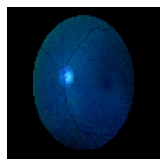

In [10]:
#lbp = local_binary_pattern(img, 12, 3)
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1,2,1)
    plt.imshow(actual_pics[i]); plt.axis('off')

In [11]:
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

#normalize our data !!
labels = {
    'M': 0,
    'H': 1,
    'C': 2,
    'N': 3,
    'O': 4,
    'D': 5, 
    'A': 6,
    'G': 7
}

print(classifications[0])
for idx, label in enumerate(classifications):
    classifications[idx] = labels[label]
classifications = utils.to_categorical(classifications)


actual_pics = np.array(actual_pics)
classifications = np.array(classifications)
actual_pics.astype('float32')/255.0
# plt.subplot(1,2,1)
# plt.imshow(actual_pics[0]); plt.axis('off')
    
#shuffle = false prevents data split being different everytime
X_train, X_test, y_train, y_test = train_test_split(actual_pics, classifications, test_size=0.2, shuffle = False)

#split test into validate and test, again making sure the data is always the same for consistency
X_train, xt, y_train, yt = train_test_split(X_train, y_train, test_size=0.1, shuffle = False)

D


In [12]:
#begin NN 
import logging
logging.basicConfig()
import tensorflow as tf 

In [13]:
import numpy
len(actual_pics[2][0])

100

In [14]:
X_train.shape

(100, 100, 100, 3)

In [15]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(img_res, img_res, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'sigmoid'))
model.add(layers.Dense(8, activation='softmax'))

model.summary()
from tensorflow import keras
opt = keras.optimizers.Adam( learning_rate=0.00001)

#early stopping stuff
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, min_delta=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [16]:
# convert to numpy arrays
x = np.array(X_train)
y = np.array(y_train)

xt = np.array(xt)
yt = np.array(yt)

In [17]:
print(np.size(x))
print(np.shape(x))
print(np.size(y))
print(np.shape(y))

3000000
(100, 100, 100, 3)
800
(100, 8)


In [18]:
#this stores the fitting information 
#put in our own data for the images and labelling stuff

history = model.fit(x, y, epochs = 100, validation_data = (xt, yt), callbacks = [es])

#dont forget to keep training until your accuracy becomes bad 

Epoch 1/100
4/4 [==============================] - 2s 378ms/step - loss: 2.6876 - accuracy: 0.0431 - val_loss: 2.0384 - val_accuracy: 0.0833
Epoch 2/100
4/4 [==============================] - 1s 171ms/step - loss: 2.0581 - accuracy: 0.2368 - val_loss: 1.8413 - val_accuracy: 0.2500
Epoch 3/100
4/4 [==============================] - 1s 179ms/step - loss: 1.7509 - accuracy: 0.4137 - val_loss: 1.8876 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 1s 175ms/step - loss: 1.5787 - accuracy: 0.4889 - val_loss: 1.9663 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 1s 164ms/step - loss: 1.5391 - accuracy: 0.4661 - val_loss: 2.0305 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 1s 174ms/step - loss: 1.5426 - accuracy: 0.4734 - val_loss: 2.0048 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 1s 177ms/step - loss: 1.5385 - accuracy: 0.4628 - val_loss: 2.0076 - val_accuracy: 0.3333
Epoch 8/100
4

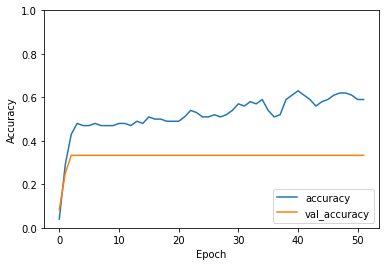

In [19]:
# Plot the change in accuracy and validation accruacy as a function of epochs

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')

In [20]:
performance = model.evaluate(X_test, y_test, verbose=1)



1/1 [==============================] - 0s 71ms/step - loss: 2.0463 - accuracy: 0.3214


In [21]:
y_pred = model.predict(X_test)
print(y_pred)

[[0.01788019 0.0412519  0.03756488 0.65811527 0.03079468 0.10197644
  0.06771158 0.04470517]
 [0.01126453 0.04205776 0.03520917 0.7129926  0.03635075 0.04830896
  0.06131411 0.05250209]
 [0.02512725 0.06266619 0.03372385 0.5755821  0.02359065 0.17180954
  0.06841676 0.0390837 ]
 [0.01516127 0.07029423 0.0597301  0.48260576 0.0703173  0.17111251
  0.03325332 0.09752548]
 [0.0090051  0.07809178 0.05038113 0.29454595 0.04907262 0.3889325
  0.03111998 0.09885097]
 [0.00699333 0.10654391 0.06794941 0.493774   0.06490017 0.13836348
  0.04922669 0.07224903]
 [0.01299536 0.08660478 0.06051234 0.44656956 0.06499157 0.20996559
  0.03271609 0.08564469]
 [0.00993584 0.06428293 0.06123386 0.4000685  0.06358665 0.24815354
  0.02885211 0.12388656]
 [0.02245953 0.07405328 0.02425255 0.53645265 0.03317115 0.19453128
  0.04550581 0.06957377]
 [0.00785277 0.08346474 0.08294502 0.3751775  0.04959106 0.2760238
  0.02302238 0.1019227 ]
 [0.03714736 0.06698447 0.02687594 0.506398   0.0258073  0.23946375
  0.